# Lab 3
### Averaging Filters

http://scikit-image.org/docs/0.13.x/api/skimage.util.html#skimage.util.random_noise

http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.median

http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gaussian

In [1]:
from commonfunctions import *
import math
import itertools


%matplotlib inline
%load_ext autoreload
%autoreload 2

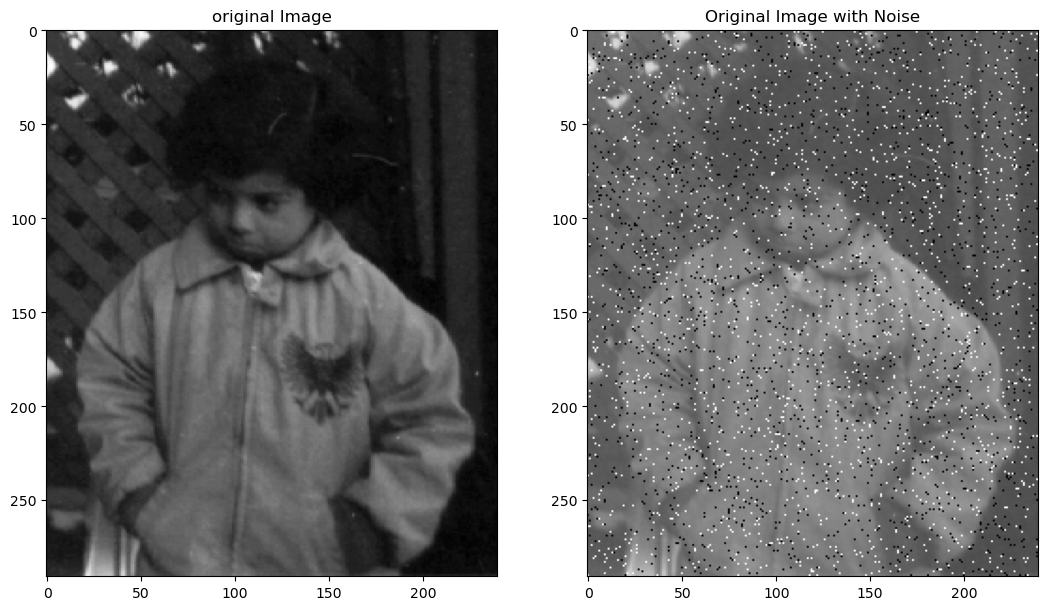

In [2]:
original_img = io.imread('pout.tif')

noisy_img = random_noise(original_img, mode="s&p",amount=0.05)

show_images([original_img, noisy_img], ["original Image", "Original Image with Noise"])

In [3]:
'''
(1) Your own median filter algorithm
'''

def smooth_image_by_median_filter(img):
    img_height = img.shape[0]
    img_width = img.shape[1]

    window_width = 3
    window_height = 3

    edgeX = (window_width  // 2) 
    edgeY = (window_height // 2)

    smoothed_img = np.zeros_like(img)

    for x, y in itertools.product(range(edgeX,img_width - edgeX), range(edgeY, img_height - edgeY)):
            
            coloured_array = np.zeros((window_height, window_width))

            for fx, fy in itertools.product(range(0, window_width), range(0, window_height)):
                coloured_array[fy][fx] = img[y + fy - edgeY][x + fx - edgeX]

            coloured_array = np.sort(coloured_array.flatten())
            median_index = (window_height * window_width) // 2
            smoothed_img[y][x] = coloured_array[median_index]

    return smoothed_img

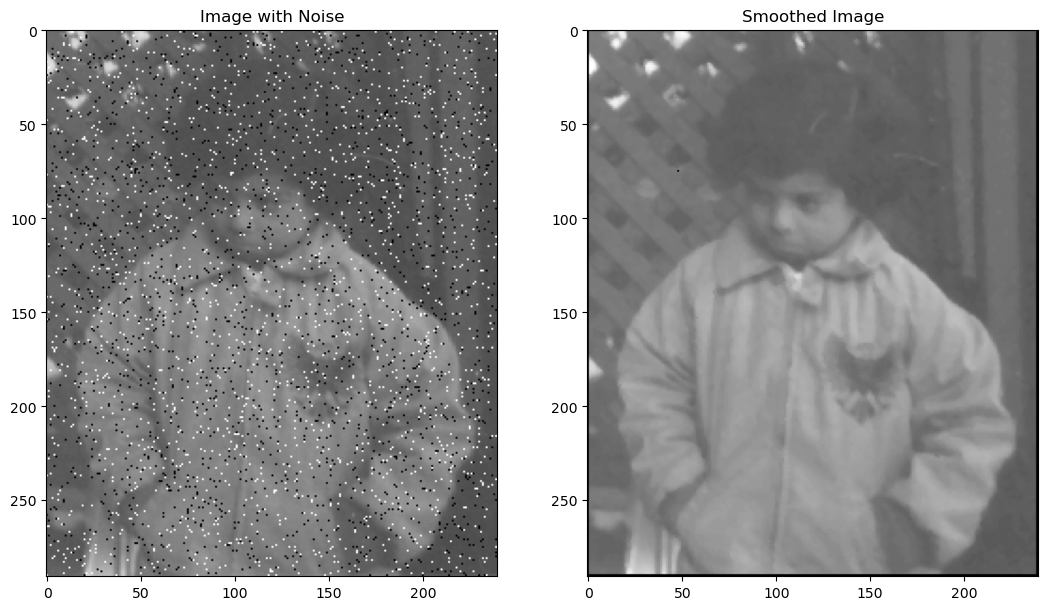

In [4]:
smoothed_image = smooth_image_by_median_filter(img=noisy_img)
show_images([noisy_img,smoothed_image],["Image with Noise","Smoothed Image"])

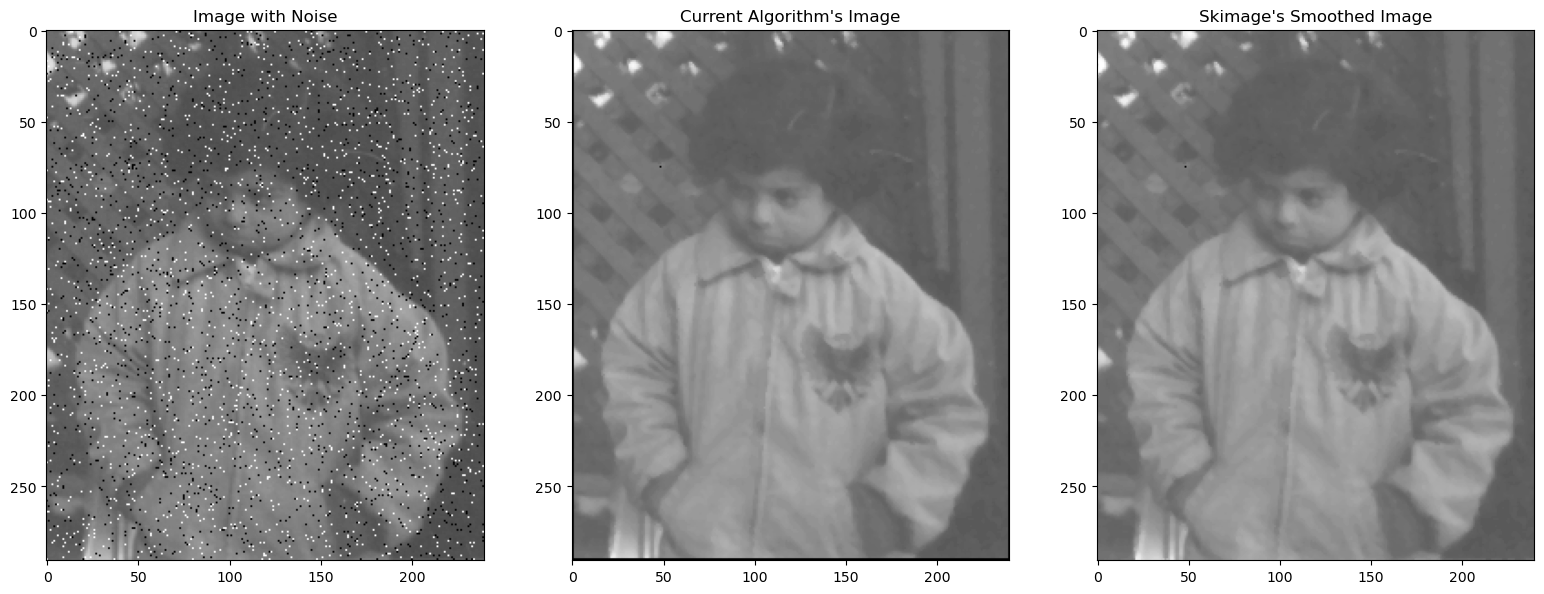

In [5]:
'''
(2) skimage median filter
'''
ski_smoothed_median_image = median(noisy_img)
show_images(
    [noisy_img, smoothed_image, ski_smoothed_median_image],
    ["Image with Noise", "Current Algorithm's Image", "Skimage's Smoothed Image"],
)

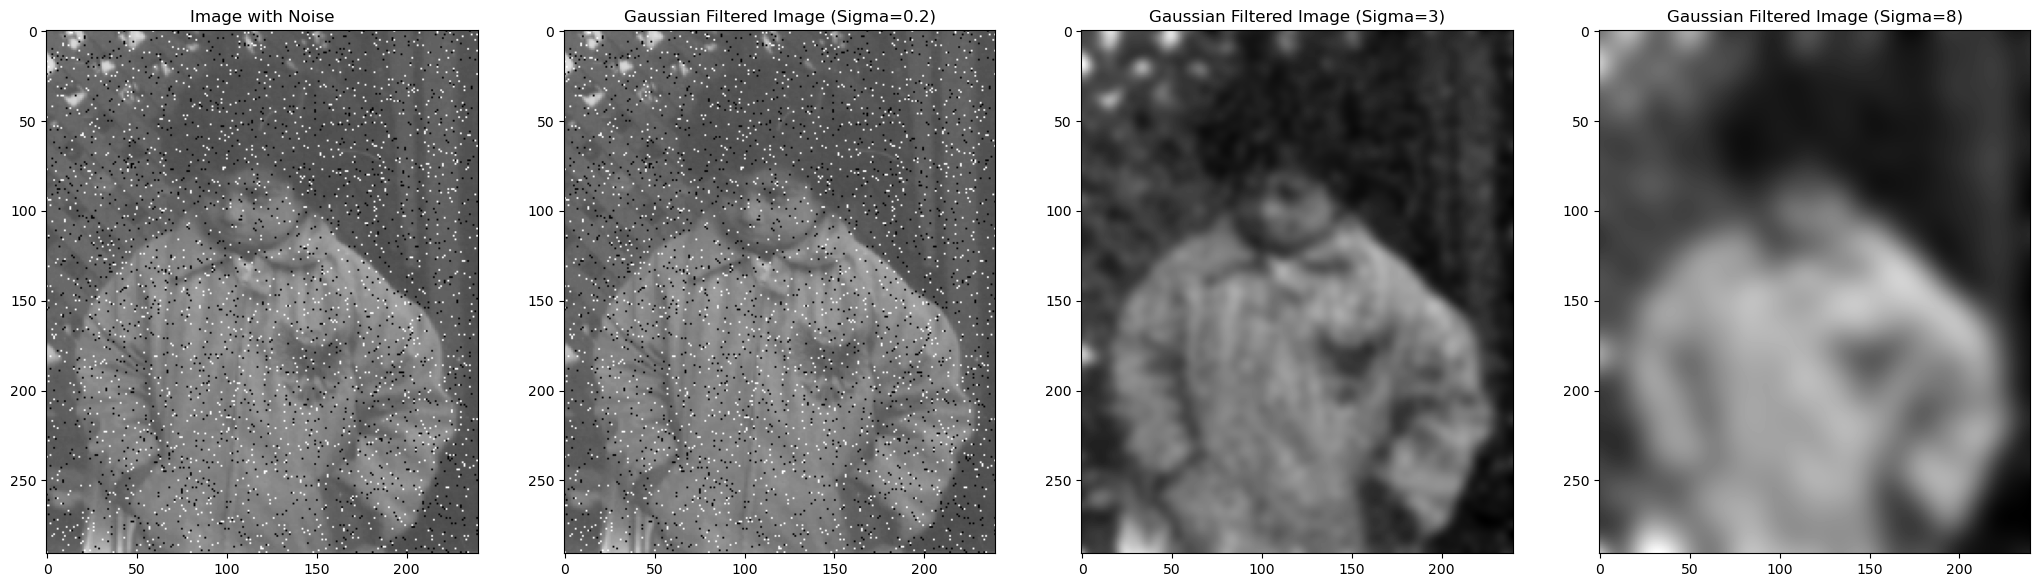

In [6]:
'''
(3) Gaussian Filters
'''

ski_smoothed_gaussian_image_1 = gaussian(noisy_img,sigma=0.2)
ski_smoothed_gaussian_image_2 = gaussian(noisy_img,sigma=3)
ski_smoothed_gaussian_image_3 = gaussian(noisy_img,sigma=8)
show_images(
    [
        noisy_img,
        ski_smoothed_gaussian_image_1,
        ski_smoothed_gaussian_image_2,
        ski_smoothed_gaussian_image_3,
    ],
    [
        "Image with Noise",
        "Gaussian Filtered Image (Sigma=0.2)",
        "Gaussian Filtered Image (Sigma=3)",
        "Gaussian Filtered Image (Sigma=8)",
    ],
)

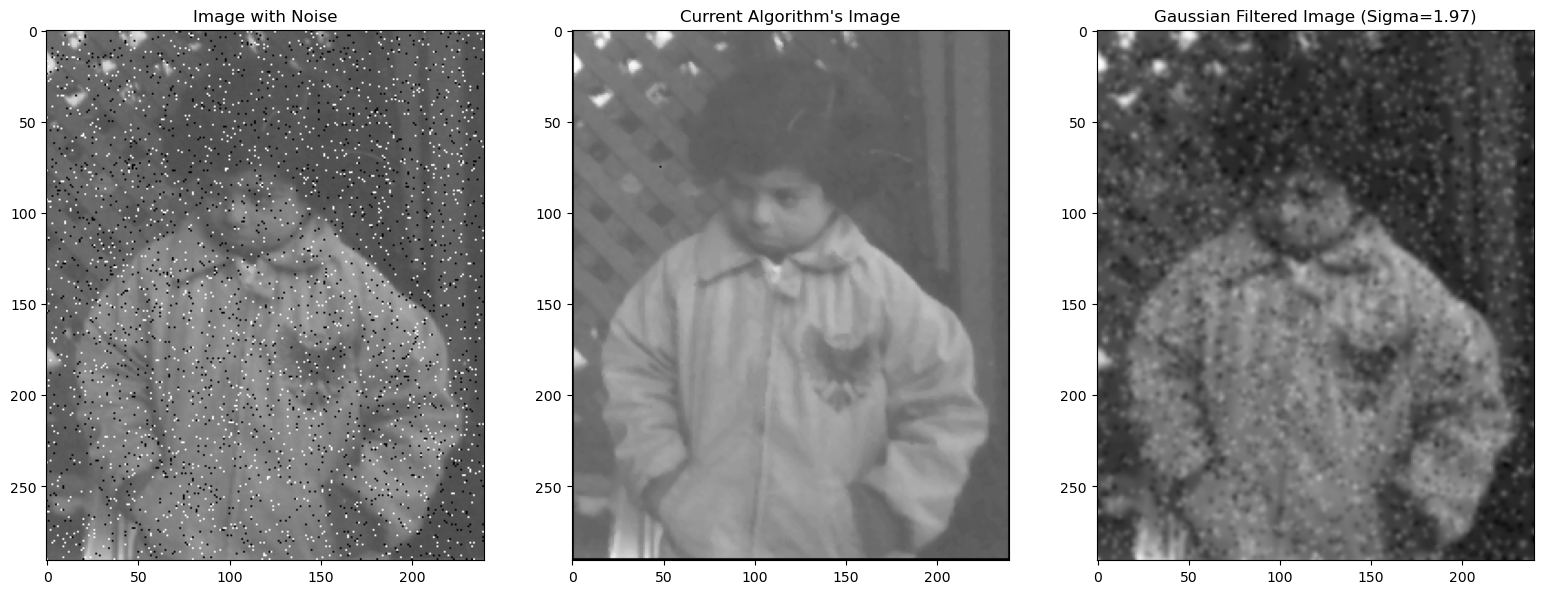

In [7]:
ski_smoothed_gaussian_image = gaussian(noisy_img, sigma=1.23)
show_images(
    [noisy_img, smoothed_image, ski_smoothed_gaussian_image],
    ["Image with Noise", "Current Algorithm's Image", "Gaussian Filtered Image (Sigma=1.97)"],
)